# This code demonstrates a Hidden markov modeling of conformational transitions betweeen markovian states

# load required packages

In [3]:
using Statistics, Plots
using Revise; using MDToolbox

┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1260


In [4]:
using BSON: @load
#@load "data/t1r/t1r.bson" C T pi_i p_all indexOfCluster tau pdb psf
@load "data/t1r/t1r.bson" T pi_i p_all

In [5]:
nstate = size(T, 1)

50

# generate training data

In [6]:
state = msmgenerate(1000, T, pi_i)

1000-element Array{Int64,1}:
  8
 43
 29
 29
  8
 50
 48
 31
 40
 49
 50
  7
 49
  ⋮
 21
 40
 19
  8
 32
  8
  8
 26
 44
 25
 24
 39

# calculate emissions

In [31]:
nframe = length(state)
emission = zeros(Float64, nstate, nframe)
emission .= 0.01
for iframe = 1:nframe
    emission[state[iframe], iframe] = 1.0
end
#emission .= emission ./ sum(emission, dims=1)
emission

50×1000 Array{Float64,2}:
 0.01  0.01  0.01  0.01  0.01  0.01  …  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01     0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01     0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01     0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01     0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  …  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01     0.01  0.01  0.01  0.01  0.01  0.01
 1.0   0.01  0.01  0.01  1.0   0.01     1.0   0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01     0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01     0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01  …  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01     0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.01  0.01     0.01  0.01  0.01  0.01  0.01  0.01

In [17]:
observation = collect(1:nframe)

1000-element Array{Int64,1}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
  989
  990
  991
  992
  993
  994
  995
  996
  997
  998
  999
 1000

# Hidden markov modeling

In [18]:
# initial transition probabilities
T0 = rand(Float64, nstate, nstate)
T0 .= T0 ./ sum(T0, dims=2)
pi_i = T0[1, :]

50-element Array{Float64,1}:
 0.035002013363867955
 0.0027392592471371336
 0.01474269411027784
 0.007144232973025328
 0.014004138085580157
 0.018438198225435756
 0.012603073126062094
 0.018106536536633758
 0.0048236601281022905
 0.01454314585484147
 0.016616316123998037
 0.03335154168206111
 0.04492048562243977
 ⋮
 0.024170321434120463
 0.03622782524537461
 0.024910404101737945
 0.03548413643679748
 0.02780812950204982
 0.018527672505853424
 0.025075618933586414
 0.04240629903758122
 0.027721611440532413
 0.011097602131153505
 0.026615479164919586
 0.032732877921786814

In [19]:
@time T1, pi_i1, emission1 = msmbaumwelch([observation], T0, pi_i, emission);

  5.978160 seconds (2.67 M allocations: 4.134 GiB, 18.67% gc time)


# visualization

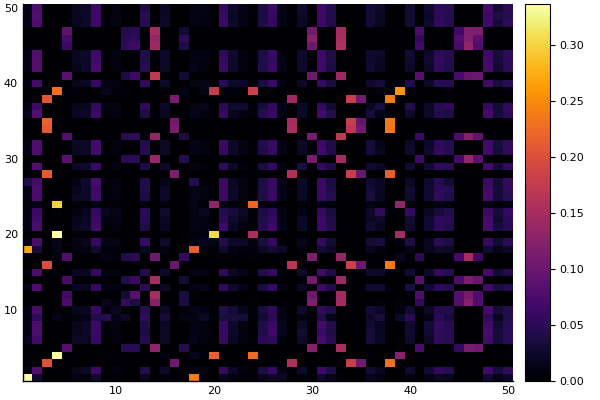

In [27]:
heatmap(T, zlim=(0,0.5))

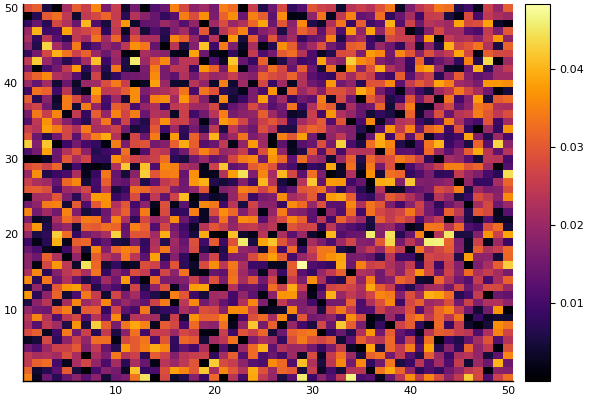

In [25]:
heatmap(T0, zlim=(0,0.5))

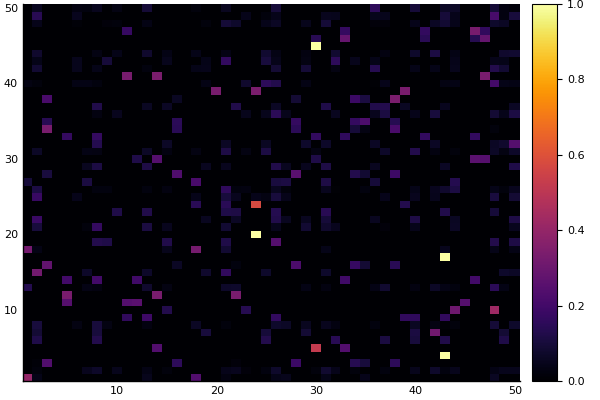

In [26]:
heatmap(T1, zlim=(0,0.5))

# visualization 2

In [78]:
using GraphRecipes, Plots
pyplot()

Plots.PyPlotBackend()

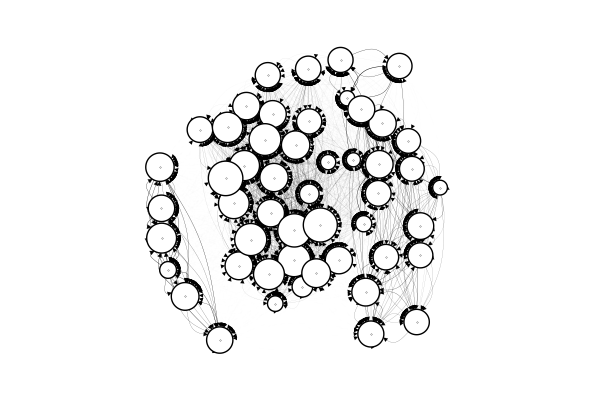

In [71]:
graphplot(T,
          markersize = 0.2,
          node_weights = pi_i,
          markercolor = :white,
          names = 1:size(T, 1),
          fontsize = 10,
          linecolor = :darkgrey,
          nodeshape = :circle,
          edgewidth = T, 
          self_edge_size = 0.0, 
          arrow = true
          )

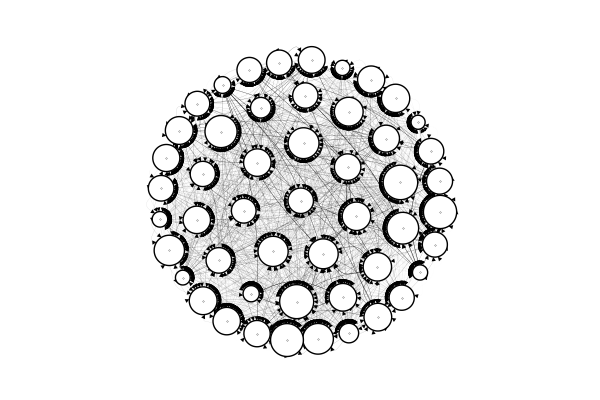

In [72]:
graphplot(T1,
          markersize = 0.2,
          node_weights = pi_i,
          markercolor = :white,
          names = 1:size(T, 1),
          fontsize = 10,
          linecolor = :darkgrey,
          nodeshape = :circle,
          edgewidth = T, 
          self_edge_size = 0.0, 
          arrow = true
          )

# Viterbi algorithm

In [28]:
@time state_estimated = msmviterbi(observation, T1, pi_i1, emission1);

  0.047748 seconds (12.00 k allocations: 5.091 MiB)


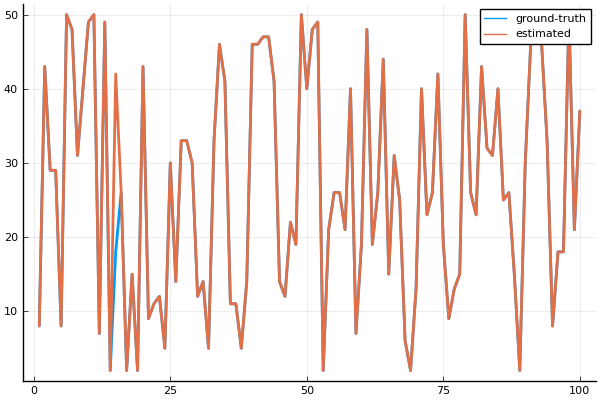

In [30]:
pyplot()
plot(state[1:100], line=(2), label="ground-truth")
plot!(state_estimated[1:100], line=(2), label="estimated", legend=:topright)